## [2장, 데이터 다루기]
### 2-1. 훈련세트와 테스트세트

지도학습과 비지도학습
- 지도학습: 훈련하기 위한 입력(데이터)와 타깃(정답)이 필요
-> 앞선 도미와 빙어 예제에서 입력은 특성(길이와 무게), 타깃은 도미

- 비지도학습: 타깃이 없이 입력 데이터만 사용
-> 타깃이 없기 때문에 무언가를 맞추기 위한 알고리즘이 아닌, 데이터를 파악하고, 변형하는 목적을 가짐

- 추가 : 강화학습(reinforcement learning)은 후에 학습 예정


---


#### 훈련세트와 테스트세트
머신러닝의 정확한 평가를 위해서 필요

1. 준비된 데이터를 훈련세트와 테스트세트로 분리
2. 훈련세트를 통해 모델 학습
3. 분리해둔 테스트세트로 모델을 평가


In [ ]:
#앞선 예제의 도미와 빙어 데이터를 통해 훈련/테스트 분리 예제
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#생선의 길이와 무게를 담은 2차원 리스트 만들기
fish_data= [[l,w]for l,w in zip(fish_length, fish_weight)]
fish_target= [1]*35+[0]*14

#K최근접이웃 클래스 임포트, 인덱스지정하여 훈련/테스트 분리
from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier()
print(fish_data[4]) #인덱스는 0부터 시작하기 때문에 [4]를 입력하면 5번째 샘플이 출력된다.

[29.0, 430.0]


In [ ]:
#슬라이싱:인덱스의 범위를 지정하여 여러 원소를 선택
print(fish_data[0:5])
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [ ]:
#train/test 분리
train_input=fish_data[:35]
train_target=fish_target[:35]
test_input=fish_data[35:]
test_target=fish_target[35:]

In [ ]:
kn= kn.fit(train_input, train_target)
kn.score(test_input,test_target)

0.0

위와같이 앞/뒤로 인덱스를 나누어 세트를 분리하는 것은 **샘플링편향**이 발생
- 샘플링편향 : 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않아 생기는 문제
-> 넘파이 라이브러리를 통해 샘플링 진행 필요 (고차원 배열을 다루기 좋은 라이브러리)

In [ ]:
import numpy as np
input_arr=np.array(fish_data)
target_arr=np.array(fish_target)
print(input_arr) #49개 행과 2개 열 확인 가능

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
#랜덤한 배열의 인덱스를 생성하고, 인덱스를 슬라이싱하여 훈련세트와 테스트세트 분리
np.random.seed(42)
index= np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
train_input =input_arr[index[:35]] #랜덤한 배열의 인덱스를 train,test세트 분리에 사용
train_target= target_arr[index[:35]]
test_input =input_arr[index[35:]]
test_target= target_arr[index[35:]]

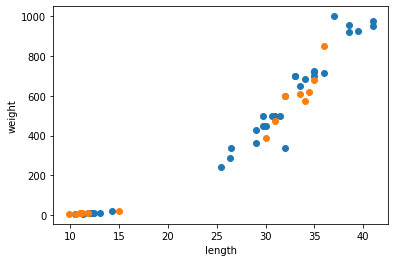

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show() #의도한 대로 test/train 세트에 도미와 빙어가 적절히 나눠진 것을 확인 (주황색: 테스트, 파란색: 트레인)

In [ ]:
kn=kn.fit(train_input,train_target)
kn.score(test_input,test_target) #test/target을 분리하여 모델 테스트한 결과

1.0

###마무리
모델의 정확한 학습을 위해 train/test 세트를 분리했다.

train에서 모델을 학습하고, test에서 모델의 평가가 진행되어 